In [3]:
# @Hrushikesh

# Central Limit Theorem Principles
Sample Means Distribtion For Increasing Sample
Sizes

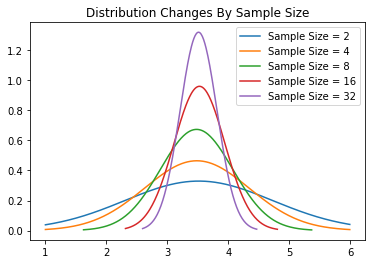

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
die_values = [1, 2, 3, 4, 5, 6]
sample_sizes = [2, 4, 8, 16, 32]
for experiment in range(1):
    for sample_size in sample_sizes:
        sample_means = []
        for num_samples in range(1000):
            die_cast = np.random.choice(
                die_values, size=sample_size)
            sample_mean = np.mean(die_cast)
            sample_means.append(sample_mean)
            
            
        experiment_mean = np.mean(sample_means)
        experiment_std = np.std(sample_means)
        x_min = min(sample_means)
        x_max = max(sample_means)
        x = np.arange(x_min, x_max, 0.01)
        y = norm.pdf(x, experiment_mean, experiment_std)
        plt.plot(x, y)
        
    legend_texts = [f'Sample Size = {v}' for v in sample_sizes]
    plt.legend(legend_texts)
    plt.title("Distribution Changes By Sample Size")
    plt.show()

# Approaching The Central Limit Theorem

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

In [3]:
cwd = os.getcwd()
if not os.path.isdir(f"{cwd}/images_aclt"):
    os.mkdir(f"{cwd}/images_aclt")

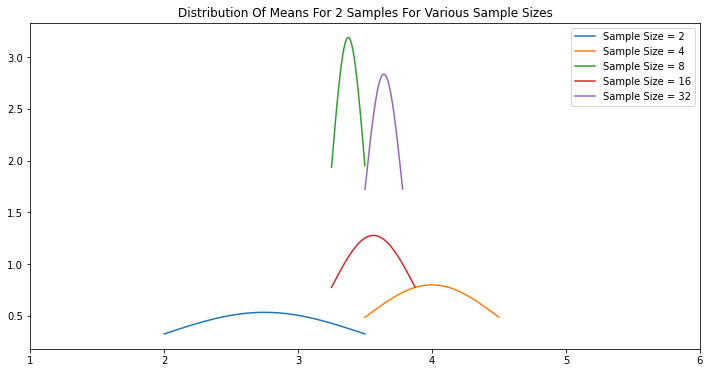

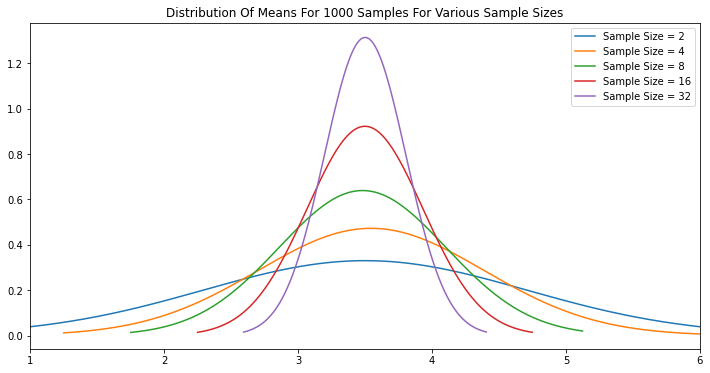

In [4]:
no_images = True
image_num = 0
if no_images:
    
    die_values = [1, 2, 3, 4, 5, 6]
    sample_sizes = [2, 4, 8, 16, 32]
    num_add_samples_list = [2] + [1]*8 + [2]*5 + [10]*8 + [100]*9
    sample_means_D = {k: [] for k in sample_sizes}
    total_samples = 0
    for num_samples in num_add_samples_list:
        total_samples += num_samples
        plt.figure(figsize=(12, 6))
        for sample_size in sample_sizes:
            for sample_num in range(num_samples):
                die_cast = np.random.choice(
                die_values, size=sample_size)
                sample_mean = np.mean(die_cast)
                sample_means_D[sample_size].append(sample_mean)
                
            experiment_mean = np.mean(sample_means_D[sample_size])
            experiment_std = np.std(sample_means_D[sample_size])
            x_min = min(sample_means_D[sample_size])
            x_max = max(sample_means_D[sample_size])
            x = np.arange(x_min, x_max, 0.001)
            y = norm.pdf(x, experiment_mean, experiment_std)
            plt.plot(x, y)
            
            
        legend_texts = [f'Sample Size = {v}' for v in sample_sizes]
        plt.legend(legend_texts)
        title = f"Distribution Of Means For {total_samples} "
        title += "Samples For Various Sample Sizes"
        plt.title(title)
        plt.xlim([1, 6])
        
        
        if total_samples == 2:
            for i in range(5):
                plt.savefig(f"{cwd}/images_aclt/{image_num:02d}.png")
                image_num += 1
                
        elif total_samples == 1000:
            for i in range(5):
                plt.savefig(f"{cwd}/images_aclt/{image_num:02d}.png")
                image_num += 1
                   
        else:
            plt.savefig(f"{cwd}/images_aclt/{image_num:02d}.png")
            image_num += 1
            plt.close()

# Sample From Huge Population To See When Central
Limit Theorem Is Reached

Population mean is 3.5


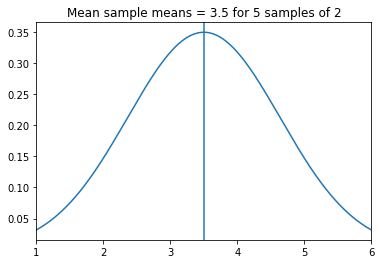

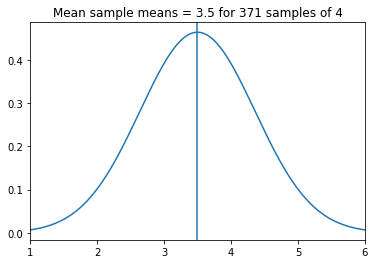

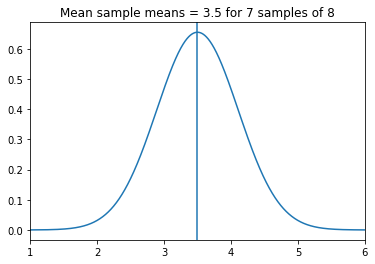

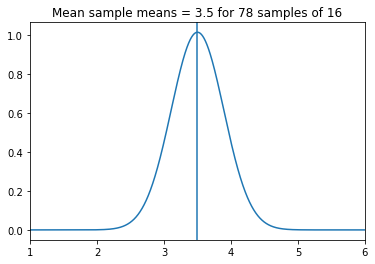

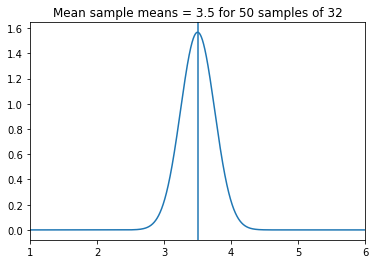

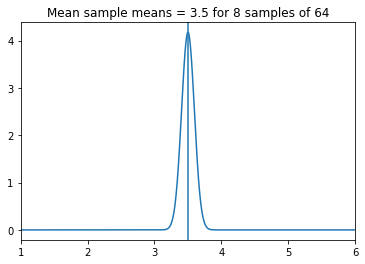

In [5]:
import numpy as np
import matplotlib.pyplot as plt

die_values = [1, 2, 3, 4, 5, 6]
die_roles = [np.random.choice(die_values, size=1)[0] for _ in range(int(1e6))]# plt.hist(die_roles, bins=6, width=0.73)

# plt.show();
mean = round(np.mean(die_roles), 1)
print(f'Population mean is {mean}')
for sample_size in [2, 4, 8, 16, 32, 64]:
    sample_means = []
    samples = 0
    while True:
        samples += 1
        roles = np.random.choice(die_roles, size=sample_size)
        sample_mean = np.mean(roles)
        sample_means.append(sample_mean)
        running_mean = round(np.mean(sample_means), 2)
        if running_mean == 3.50:
            break
            
    title = f'Mean sample means = {running_mean} for {samples} samples of {sample_size}'
    running_std = np.std(sample_means)
    x = np.arange(1, 6, 0.001)
    y = norm.pdf(x, running_mean, running_std)
    plt.xlim([1, 6])
    plt.plot(x, y)
    plt.title(title)
    plt.axvline(3.5)
    plt.show()
    
    

# The Ugly Approach To The Central Limit Theorem

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os
cwd = os.getcwd()
if not os.path.isdir(f"{cwd}/images_uclt"):
    os.mkdir(f"{cwd}/images_uclt")

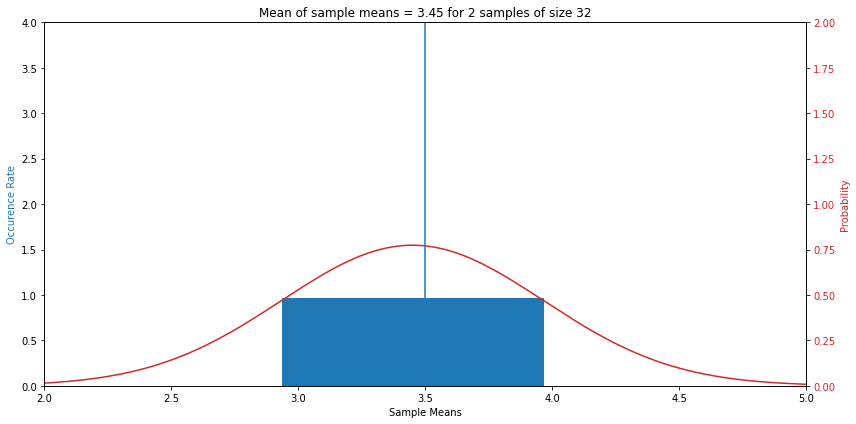

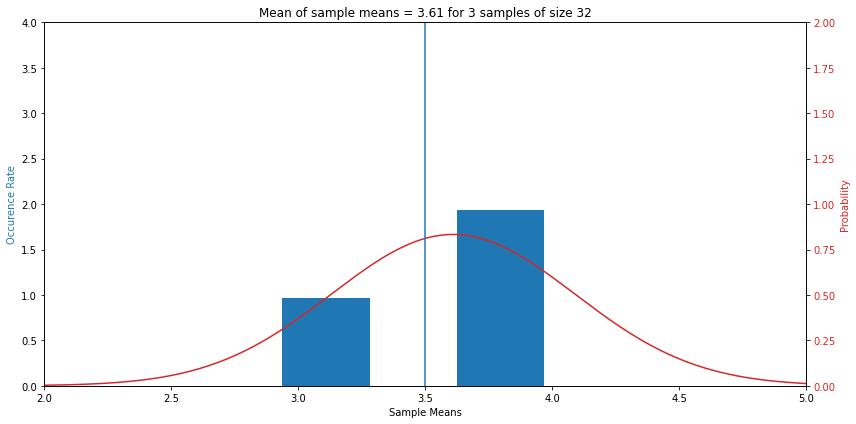

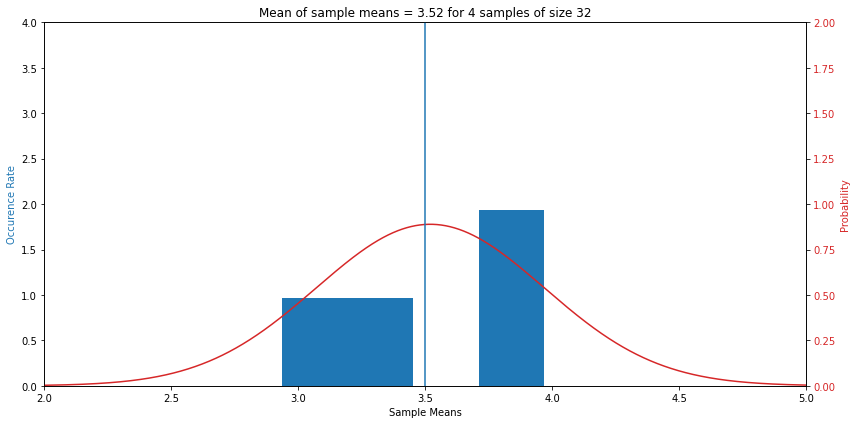

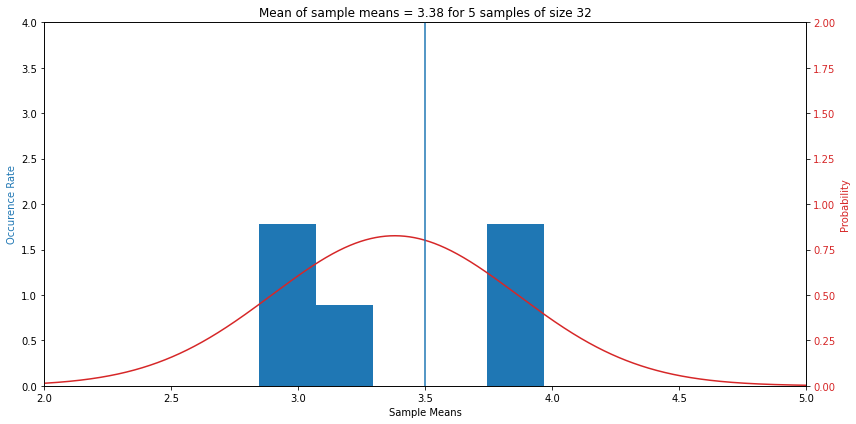

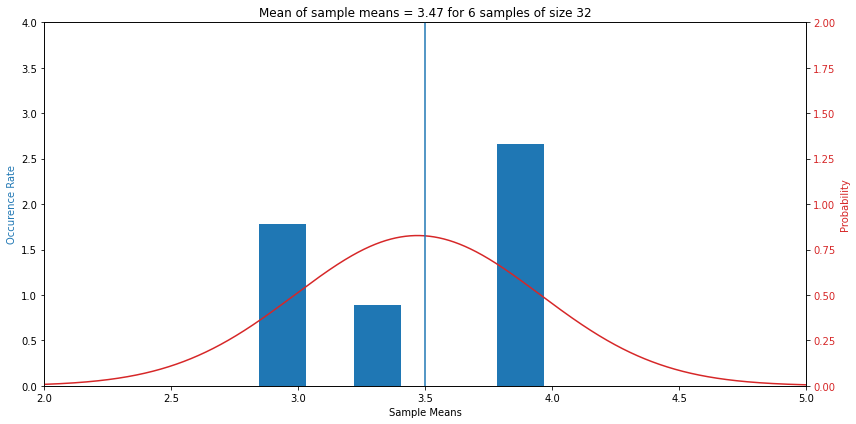

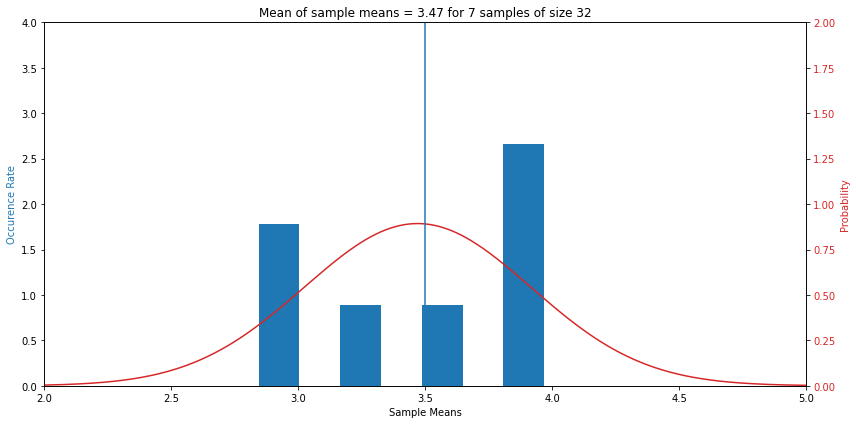

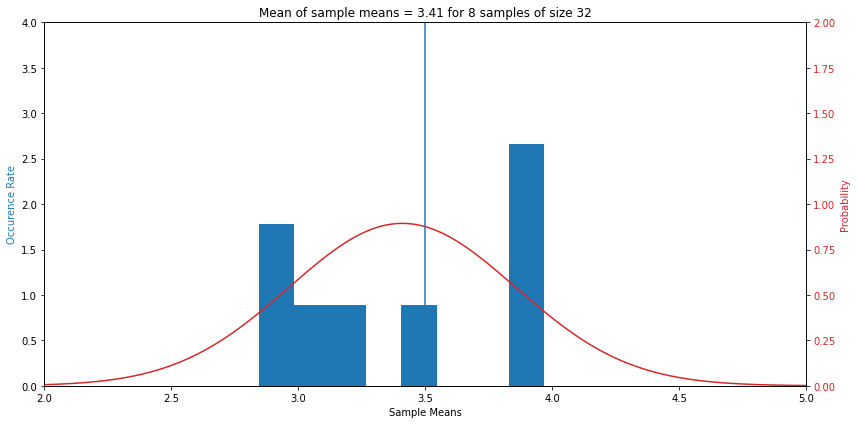

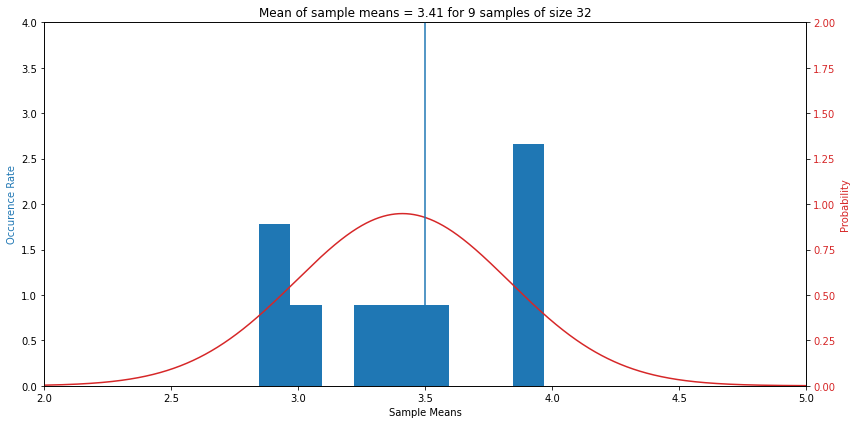

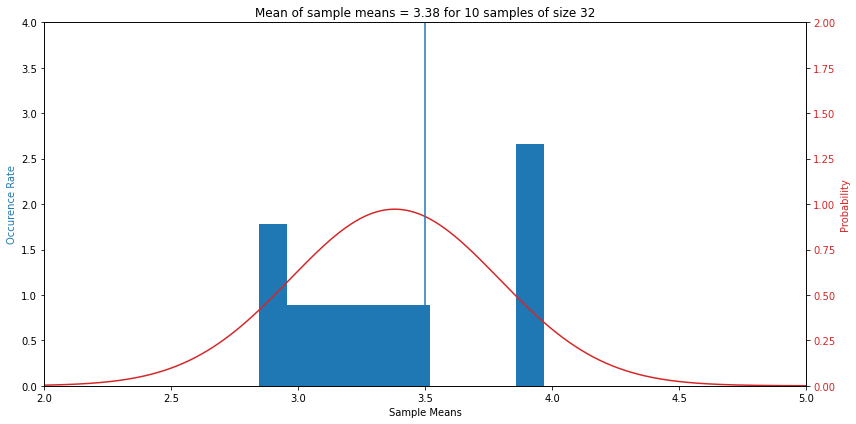

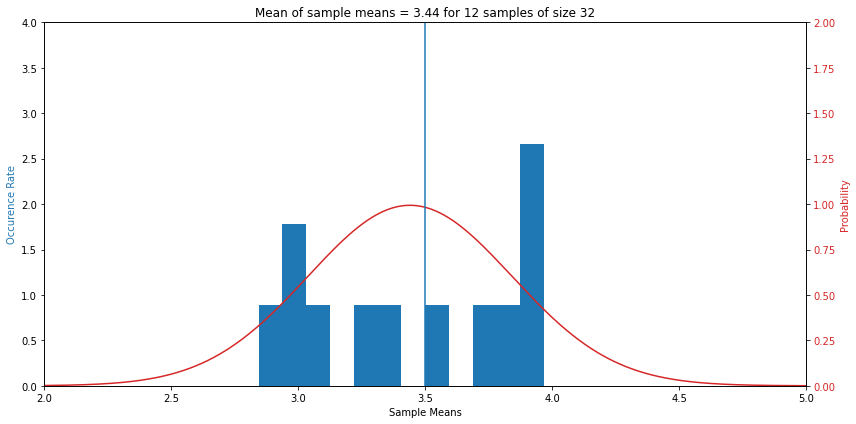

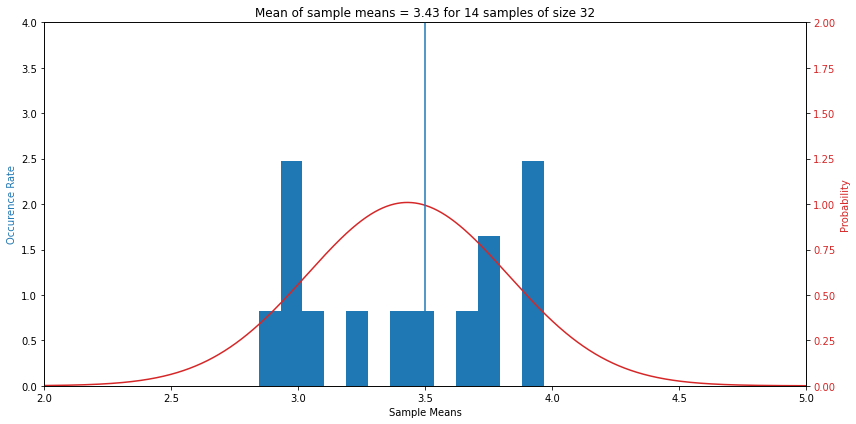

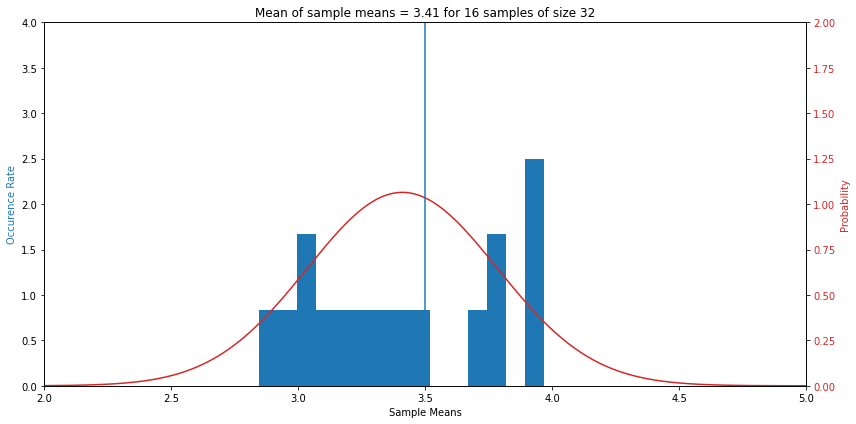

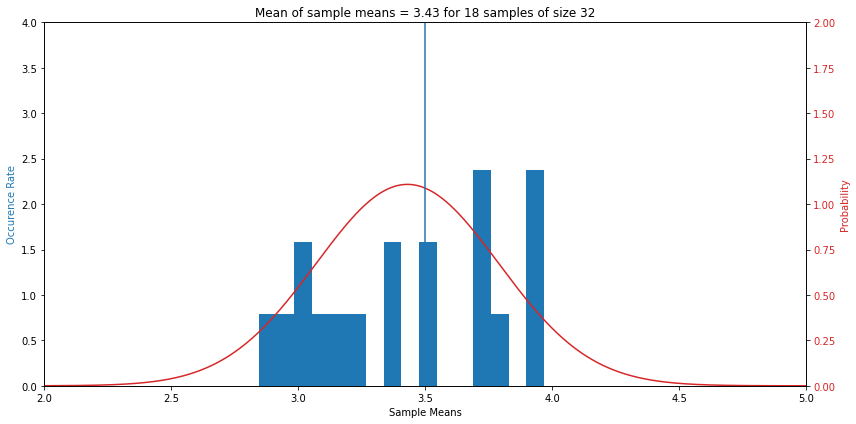

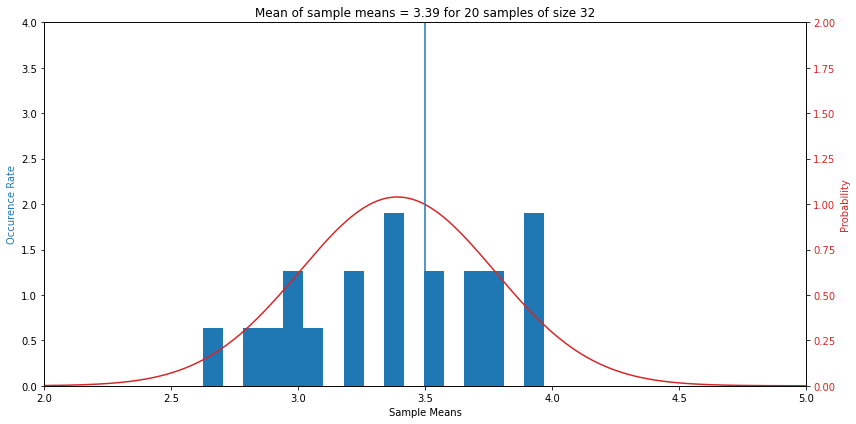

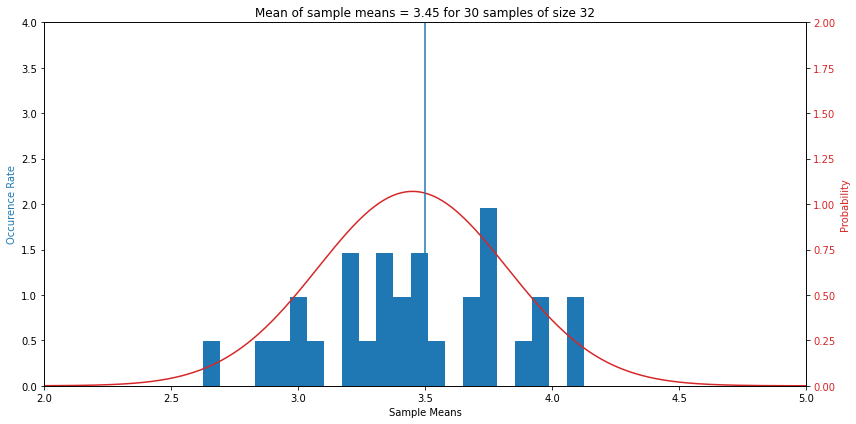

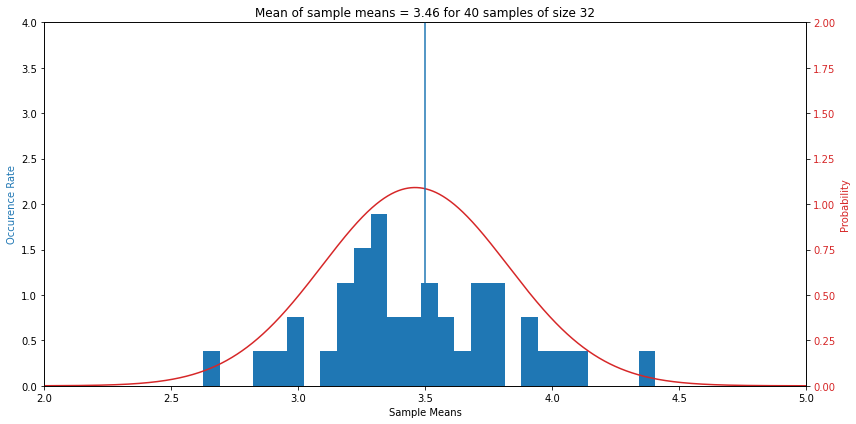

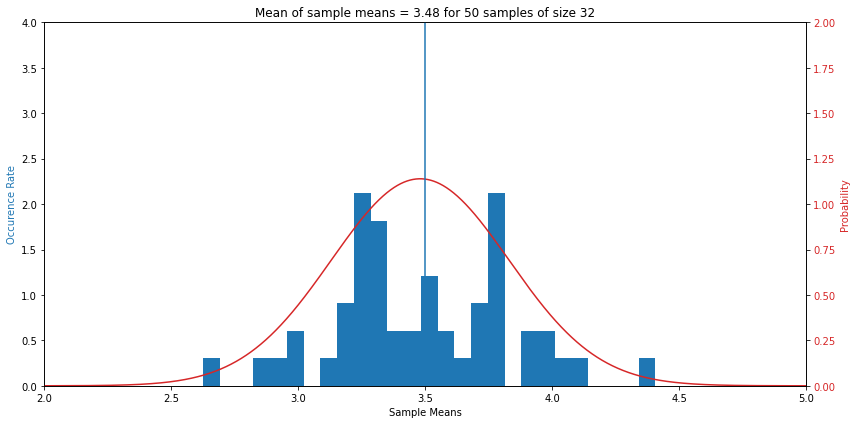

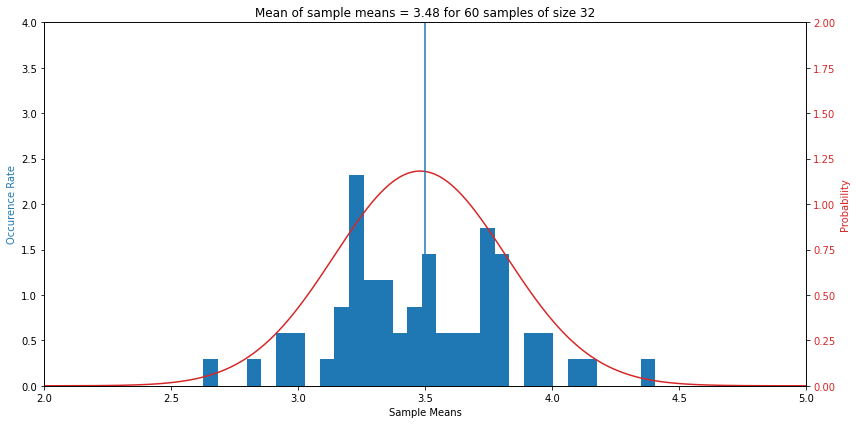

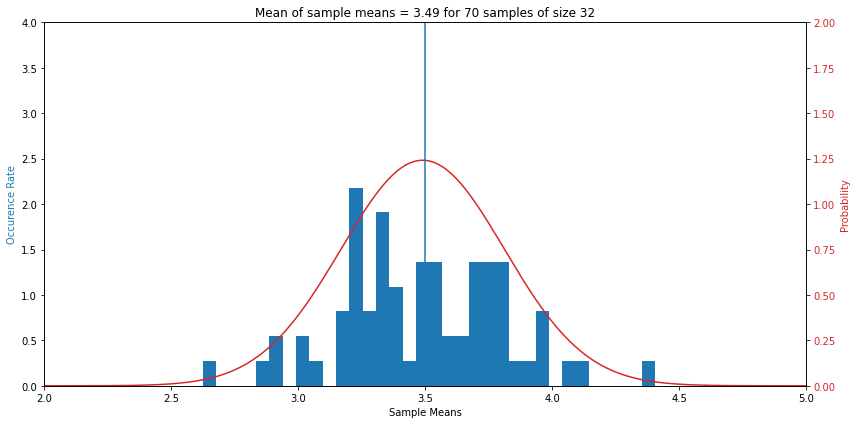

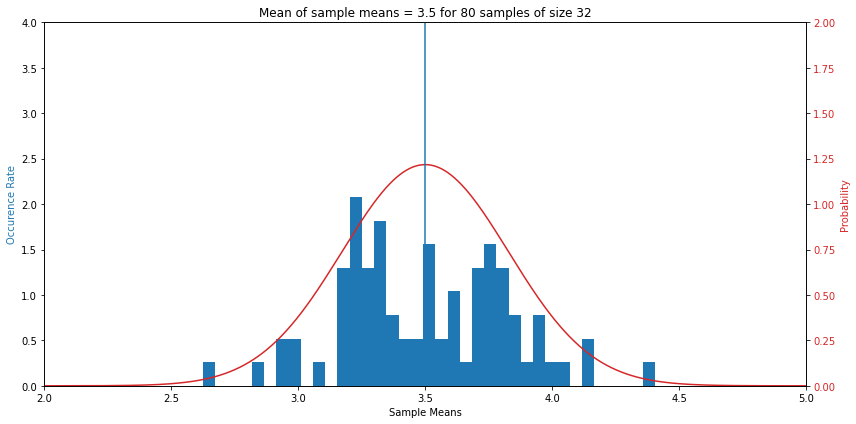

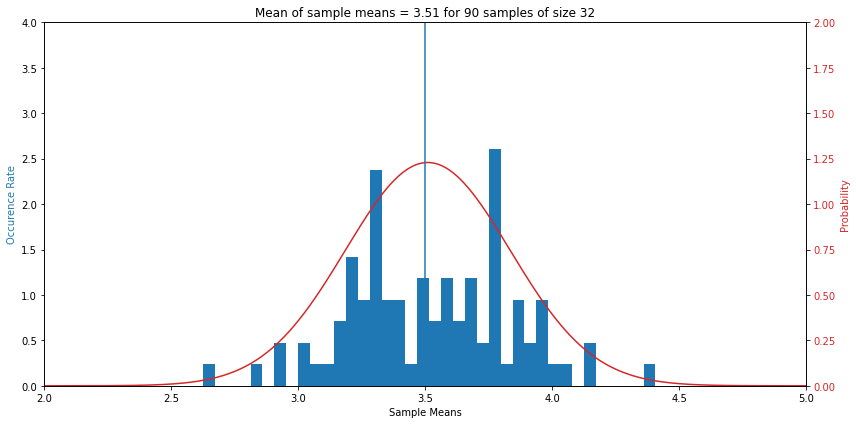

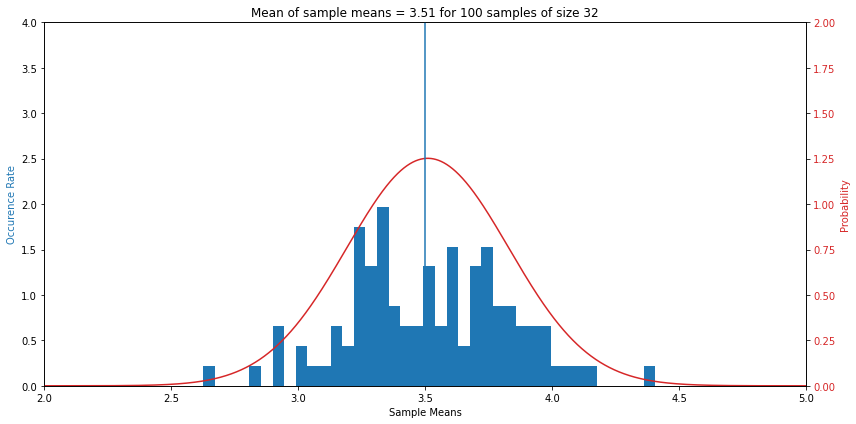

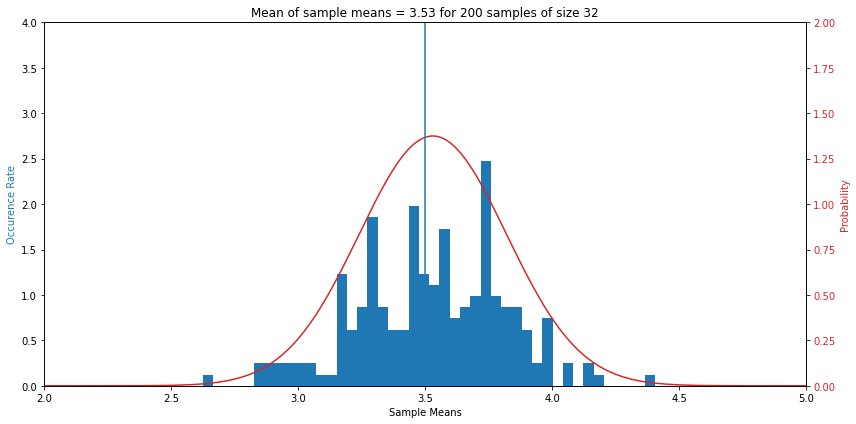

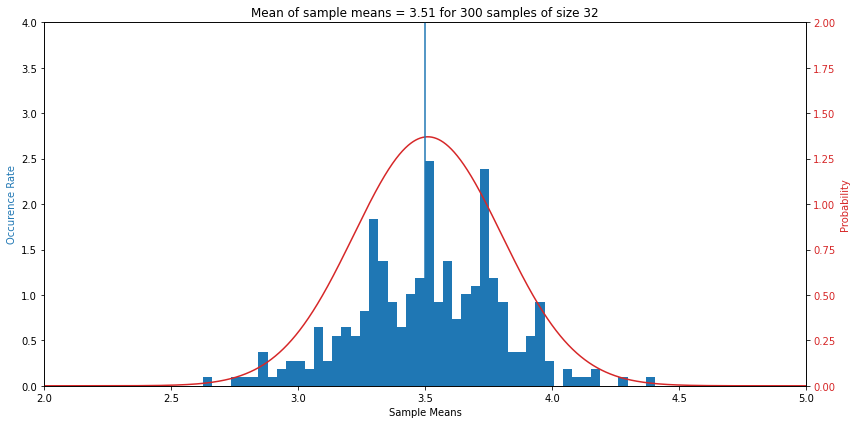

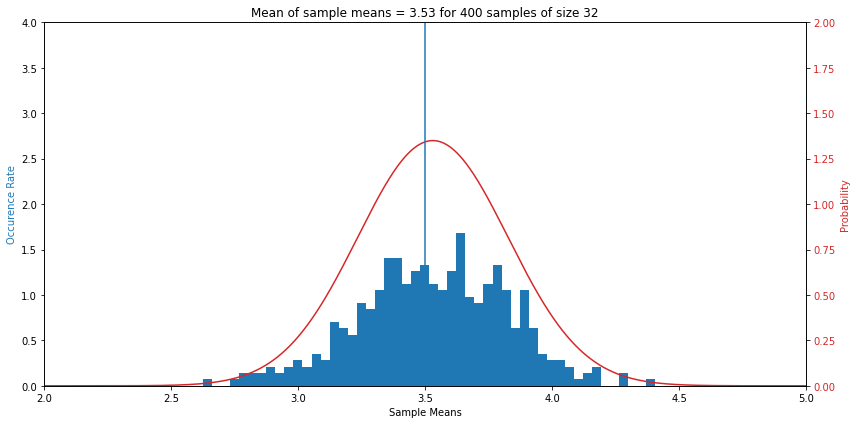

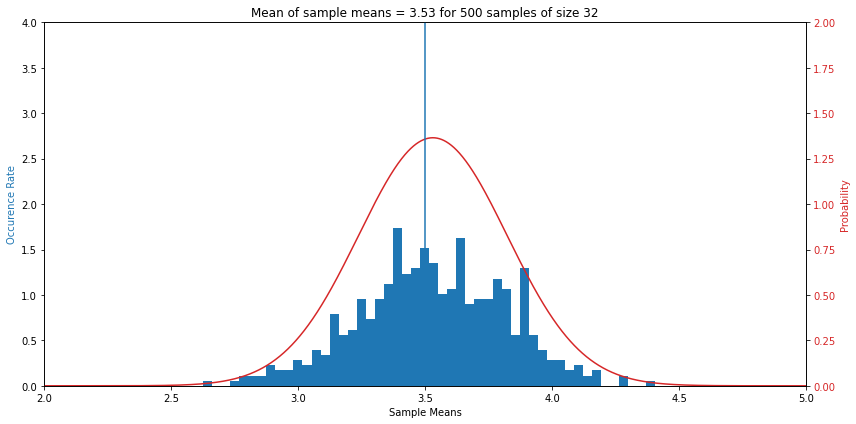

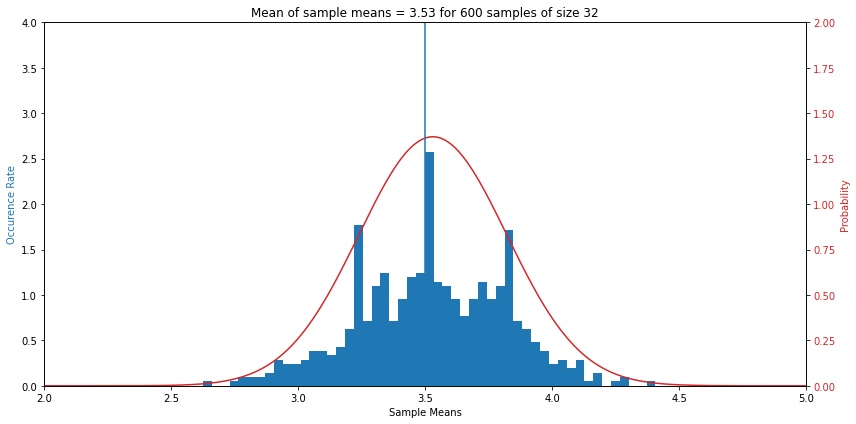

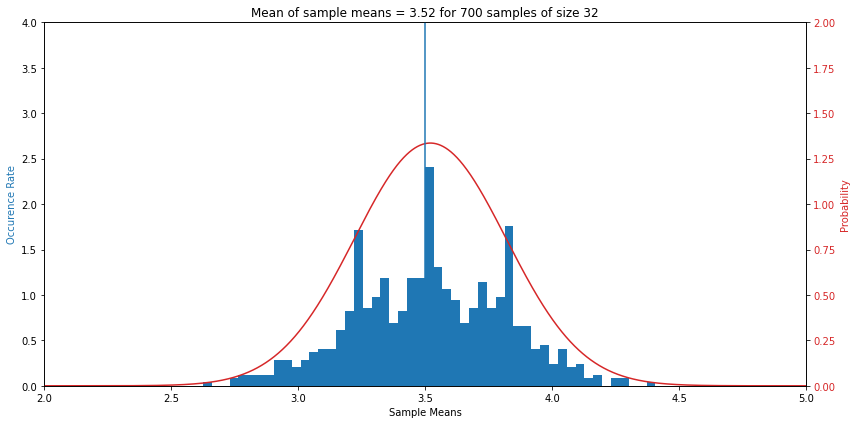

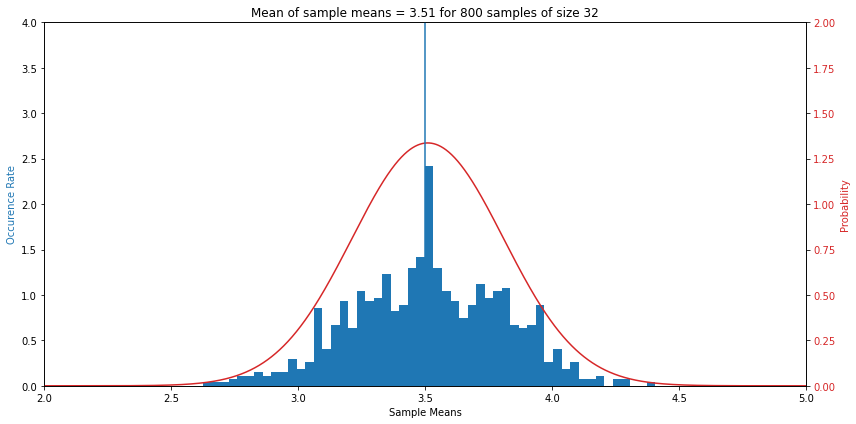

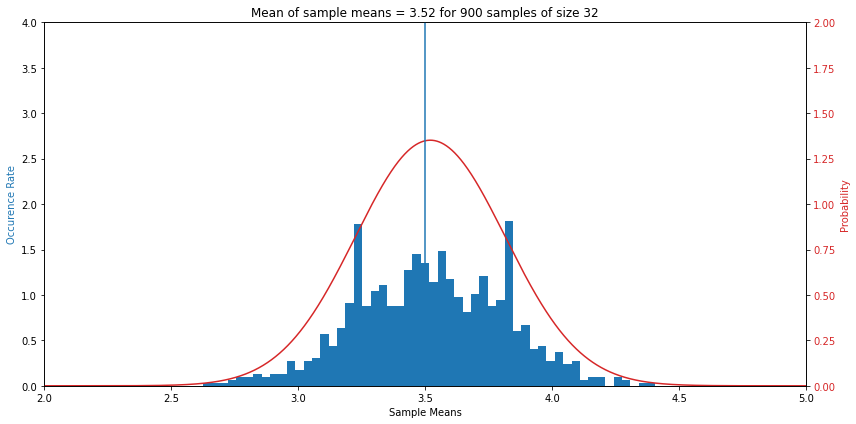

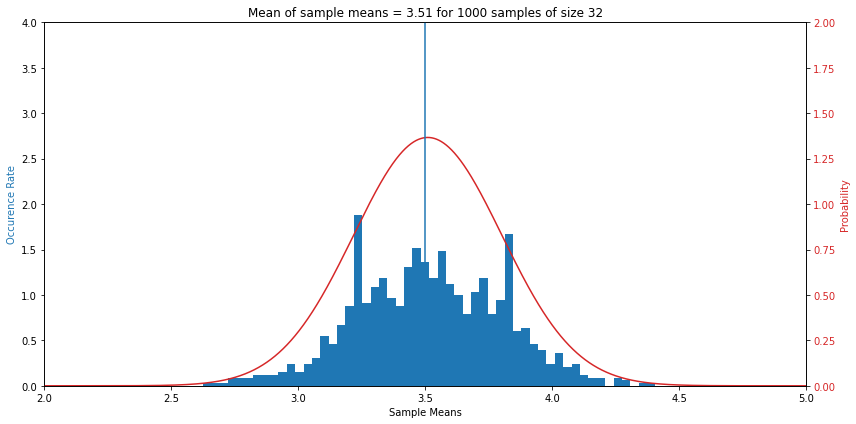

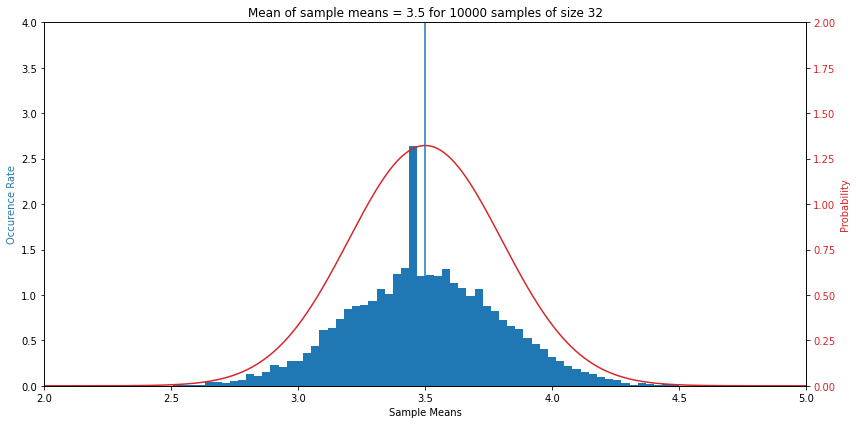

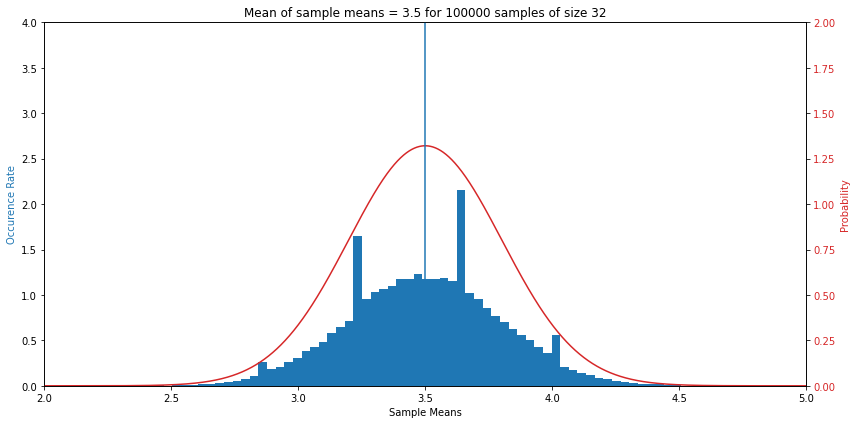

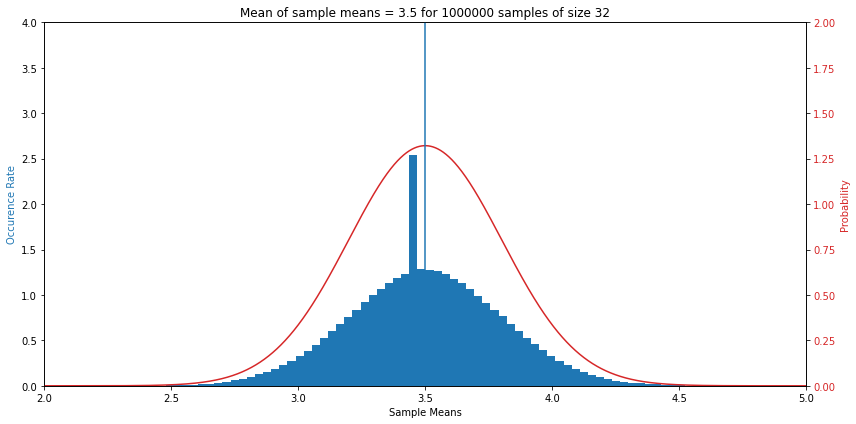

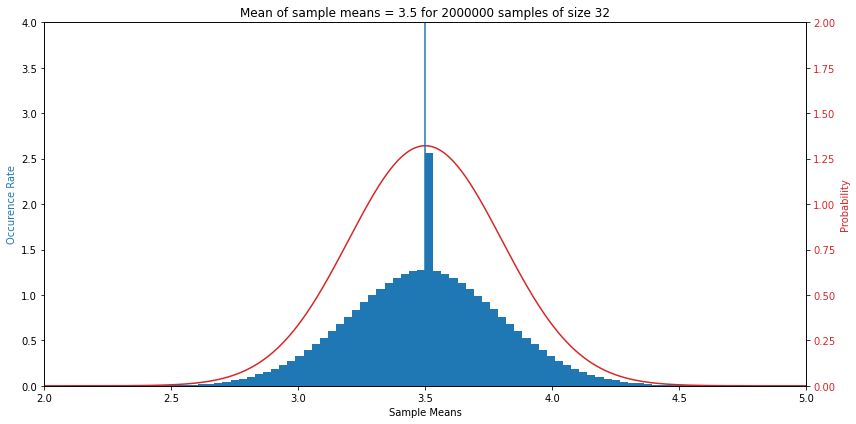

In [7]:
no_images = True
image_num = 0
if no_images:
    die_values = [1, 2, 3, 4, 5, 6]
    num_add_samples_list = [2] + [1]*8 + [2]*5 + [10]*8 + [100]*9
    num_add_samples_list += [9000] + [90000] + [900000] + [1000000]
    sample_means = []
    total_samples = 0
    
    for num_samples in num_add_samples_list:
        total_samples += num_samples
        for sample_num in range(num_samples):
            die_casts = np.random.choice(
                die_values, size=32)
            sample_mean = np.mean(die_casts)
            sample_means.append(sample_mean)

        fig, ax1 = plt.subplots()
        fig.set_figheight(6)
        fig.set_figwidth(12)
        color = 'tab:blue'
        ax1.set_xlabel('Sample Means')
        ax1.set_ylabel('Occurence Rate', color=color)
        bins = len(set(sample_means))
        ax1.hist(sample_means, bins=bins, density=True, stacked=True)
        ax1.set_xlim([2, 5])
        ax1.set_ylim([0, 4])
        ax2 = ax1.twinx()
        color = 'tab:red'
        ax2.set_ylabel('Probability', color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        running_mean = round(np.mean(sample_means), 2)
        title = f'Mean of sample means = {running_mean} '
        title += f'for {total_samples} samples of size 32'
        running_std = np.std(sample_means)
        x = np.arange(2, 5, 0.001)
        y = norm.pdf(x, running_mean, running_std)
        ax2.plot(x, y, color=color)
        ax2.set_ylim([0, 2])
        plt.title(title)
        plt.axvline(3.5)
        fig.tight_layout()
        if total_samples == 2:
            
            for i in range(5):
                plt.savefig(f"{cwd}/images_uclt/{image_num:02d}.png")
                image_num += 1
        elif total_samples > 1000000:
            for i in range(5):
                plt.savefig(f"{cwd}/images_uclt/{image_num:02d}.png")
                image_num += 1
        else:
            plt.savefig(f"{cwd}/images_uclt/{image_num:02d}.png")
            image_num += 1
            plt.show();
            plt.close()
            
#  Run below on command line in images_uclt subdirectory to create movie - needs ffmpe
# ffmpeg -framerate 4 -pattern_type glob -i "*.png" output.avi
            
